In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df_birth = pd.read_excel('data_birth_combined.xlsx')
df_birth.head()

,state,1992,1998,2005,2015,2019
0,andhrapradesh,11517,10933,13669,18311,18538
1,arunachalpradesh,2728,3219,3833,26936,33319
2,assam,10409,9893,7532,51952,57933
3,bihar,19072,23056,10448,109109,97677
4,delhi,9869,6837,6484,9281,17215


In [19]:
df_death = pd.read_excel('data_death_combined.xlsx')
df_death.head()

,state,1992,1998,2005,2015,2019
0,andhrapradesh,664,671,547,735,663
1,arunachalpradesh,92,87,155,330,236
2,assam,638,353,417,1876,1414
3,bihar,1069,1192,547,4486,4033
4,delhi,389,223,242,211,350


In [20]:
year = np.array(pd.to_numeric(df_birth.columns[1:])).reshape(-1,1)
birth_values = df_birth.values[:,1:].astype(int)
death_values = df_death.values[:,1:].astype(int)
neonatal_mortality = death_values/birth_values*1000

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

LR = LinearRegression()

poly = PolynomialFeatures(2)
PLR = LinearRegression()

In [22]:
year_trans = poly.fit_transform(year)

In [23]:
# predict the neonatal_mortality in 2030
lr_predict_1 = []
plr_predict_1 =[]
for n in neonatal_mortality:
    reg = LR.fit(year,n)
    poly_reg = PLR.fit(year_trans,n)

    lr_predict_1.append(reg.predict([[2030]])[0])
    plr_predict_1.append(poly_reg.predict(poly.fit_transform([[2030]]))[0])

In [ ]:
states = np.array(df_birth["state"])
states

In [ ]:
neonatal_mortality[0:4]

In [26]:
df_final_1 = pd.DataFrame(neonatal_mortality,columns=df_birth.columns[1:])
df_final_1.insert(0,"state",states)
df_final_1.insert(6,"2030(lr)",lr_predict_1)
df_final_1.insert(7,"2030(plr)",plr_predict_1)
df_final_1

,state,1992,1998,2005,2015,2019,2030(lr),2030(plr)
0,andhrapradesh,57.653903,61.373822,40.017558,40.139807,35.764376,24.960799,31.538638
1,arunachalpradesh,33.724340,27.027027,40.438299,12.251262,7.083046,0.305150,-37.477426
2,assam,61.293112,35.681795,55.363781,36.110256,24.407505,18.216816,7.072961
3,bihar,56.050755,51.700208,52.354518,41.114848,41.289147,34.508140,29.500781
4,delhi,39.416354,32.616645,37.322640,22.734619,20.331107,13.870010,2.252256
5,goa,32.231978,36.136206,21.247740,11.431184,5.834829,-5.224437,-16.932168
6,gujarat,51.156584,53.033749,50.177846,32.350212,27.401095,19.114248,-7.407614
7,haryana,51.669675,38.719964,31.850192,22.010021,30.163693,14.042452,42.681583
8,himachalpradesh,39.337717,25.227926,23.272467,29.338549,24.745442,20.723528,46.184331
9,jammu&kashmir,35.803497,44.149630,40.346730,27.683039,8.965033,7.809729,-42.403711


AttributeError: Rectangle.set() got an unexpected keyword argument 'colors'

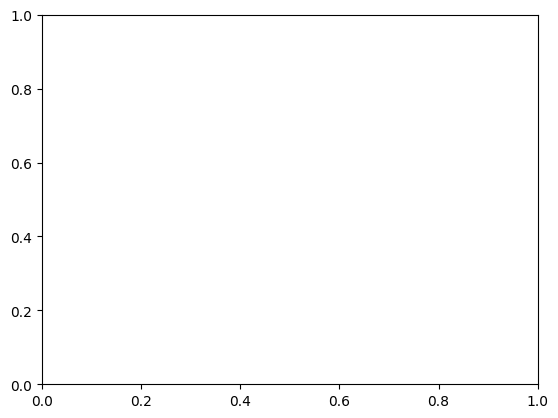

In [119]:
#Bar Plot for every state in pair of 5
X_axis = 0.0
years = df_final_1.columns[1:6].tolist()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i in range(5):
    for j in range(1,6):
        plt.bar(X_axis + 0.15*(i+ j -1), df_final_1.iloc[i, j], width = 0.15, label = years[j-1])
    X_axis += 1

plt.axhline(y=12, color='red', linestyle='--', label='Neo-Natal Mortality = 12')
plt.legend()
plt.ylabel("Neo Natal Mortality Rate")
plt.xlabel("State")
plt.show()

for i in range(5, 10):
    for j in range(1,6):
        plt.bar(X_axis + 0.15*(i+ j -1), df_final_1.iloc[i, j], width = 0.15, label = years[j-1])
    X_axis += 1

plt.axhline(y=12, color='red', linestyle='--', label='Neo-Natal Mortality = 12')
plt.legend()
plt.ylabel("Neo Natal Mortality Rate")
plt.xlabel("State")
plt.show()

for i in range(10,15):
    for j in range(1,6):
        plt.bar(X_axis + 0.15*(i+ j -1), df_final_1.iloc[i, j], width = 0.15, label = years[j-1])
    X_axis += 1

plt.axhline(y=12, color='red', linestyle='--', label='Neo-Natal Mortality = 12')
plt.legend()
plt.ylabel("Neo Natal Mortality Rate")
plt.xlabel("State")
plt.show()

for i in range(15,20):
    for j in range(1,6):
        plt.bar(X_axis + 0.15*(i+ j -1), df_final_1.iloc[i, j], width = 0.15, label = years[j-1])
    X_axis += 1

plt.axhline(y=12, color='red', linestyle='--', label='Neo-Natal Mortality = 12')
plt.legend()
plt.ylabel("Neo Natal Mortality Rate")
plt.xlabel("State")
plt.show()

for i in range(20,25):
    for j in range(1,6):
        plt.bar(X_axis + 0.15*(i+ j -1), df_final_1.iloc[i, j], width = 0.15, label = years[j-1])
    X_axis += 1

plt.axhline(y=12, color='red', linestyle='--', label='Neo-Natal Mortality = 12')
plt.legend()
plt.ylabel("Neo Natal Mortality Rate")
plt.xlabel("State")
plt.show()

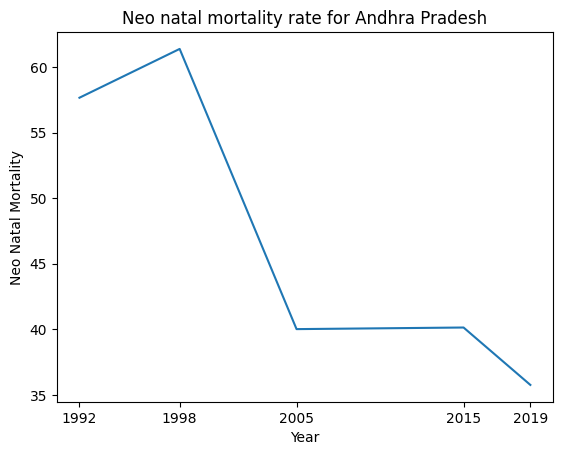

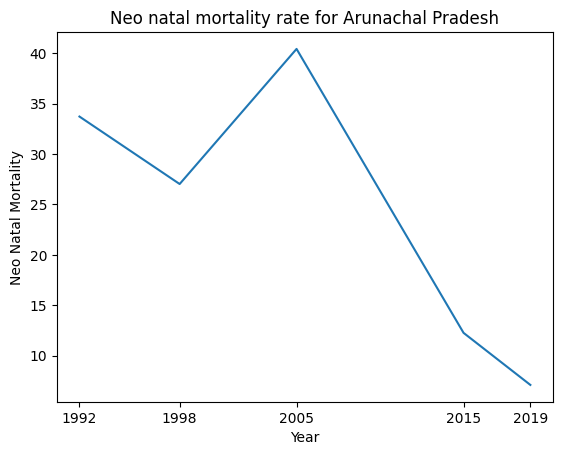

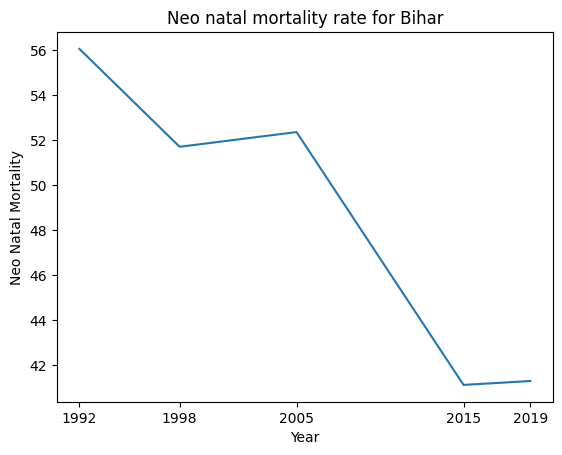

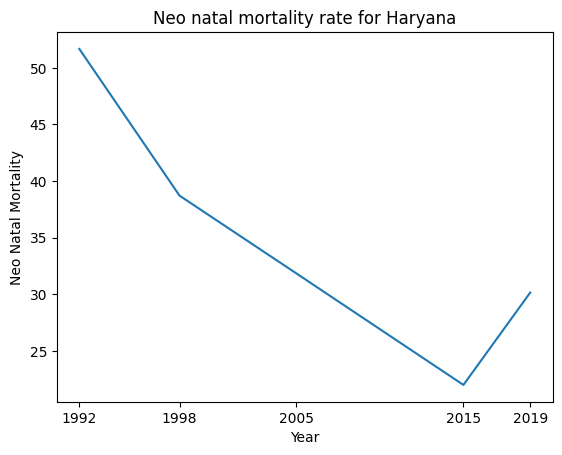

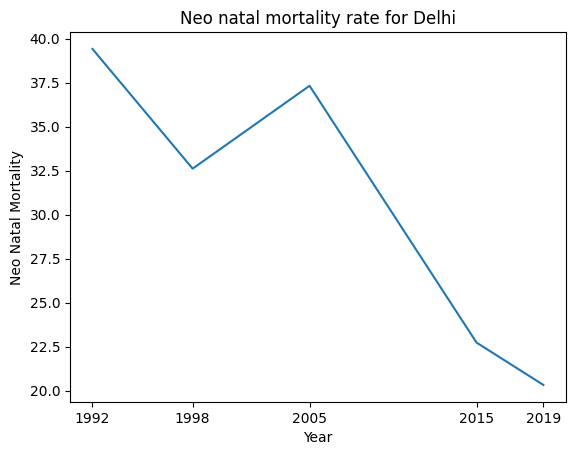

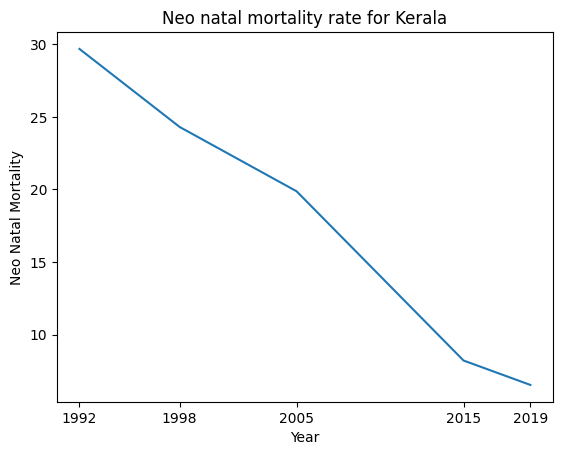

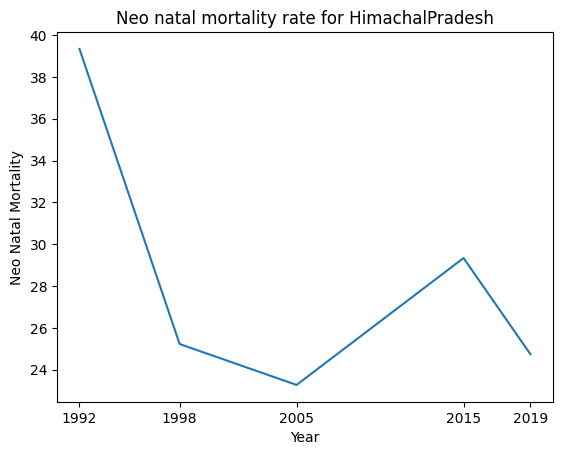

In [45]:
#line plot of differnet countries
#andhra pradesh,arunachal pradesh, bihar, haryana, delhi, kerala, himachal
x_axis = df_final_1.columns[1:6].tolist()
andhrapradesh = df_final_1.iloc[0][1:6].tolist()
arunachalpradesh = df_final_1.iloc[1][1:6].tolist()
bihar = df_final_1.iloc[3][1:6].tolist()
haryana = df_final_1.iloc[7][1:6].tolist()
delhi = df_final_1.iloc[4][1:6].tolist()
kerala = df_final_1.iloc[11][1:6].tolist()
himachalpradesh = df_final_1.iloc[8][1:6].tolist()

plt.plot(x_axis, andhrapradesh)
plt.title("Neo natal mortality rate for Andhra Pradesh")
plt.ylabel("Neo Natal Mortality")
plt.xlabel("Year")
plt.xticks(x_axis)
plt.show()
plt.plot(x_axis, arunachalpradesh)
plt.title("Neo natal mortality rate for Arunachal Pradesh")
plt.ylabel("Neo Natal Mortality")
plt.xlabel("Year")
plt.xticks(x_axis)
plt.show()
plt.plot(x_axis, bihar)
plt.title("Neo natal mortality rate for Bihar")
plt.ylabel("Neo Natal Mortality")
plt.xlabel("Year")
plt.xticks(x_axis)
plt.show()
plt.plot(x_axis, haryana)
plt.title("Neo natal mortality rate for Haryana")
plt.ylabel("Neo Natal Mortality")
plt.xlabel("Year")
plt.xticks(x_axis)
plt.show()
plt.plot(x_axis, delhi)
plt.title("Neo natal mortality rate for Delhi")
plt.ylabel("Neo Natal Mortality")
plt.xlabel("Year")
plt.xticks(x_axis)
plt.show()
plt.plot(x_axis, kerala)
plt.title("Neo natal mortality rate for Kerala")
plt.ylabel("Neo Natal Mortality")
plt.xlabel("Year")
plt.xticks(x_axis)
plt.show()
plt.plot(x_axis, himachalpradesh)
plt.title("Neo natal mortality rate for HimachalPradesh")
plt.ylabel("Neo Natal Mortality")
plt.xlabel("Year")
plt.xticks(x_axis)
plt.show()


10
7
8


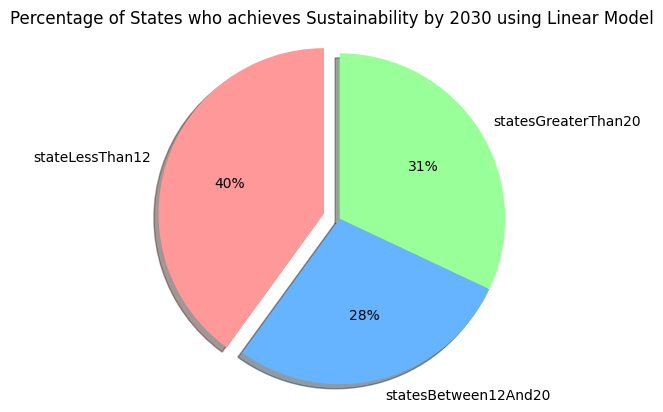

In [57]:
#Pie chart for neo natal mortality, linear Model
stateLessThan12 = (df_final_1["2030(lr)"]<=12).sum()
statesBetween12And20 = ((df_final_1["2030(lr)"]>12) & (df_final_1["2030(lr)"] <=20)).sum()
statesGreaterThan20 = (df_final_1["2030(lr)"]>20).sum()
total = stateLessThan12+statesBetween12And20+statesGreaterThan20

print(stateLessThan12)
print(statesBetween12And20)
print(statesGreaterThan20)

labels = ["stateLessThan12", "statesBetween12And20", "statesGreaterThan20"]
percentage = [stateLessThan12, statesBetween12And20, statesGreaterThan20]

colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors for each variable
explode = (0.1, 0, 0)  # Separate Variable A with a 3D effect

fig, ax = plt.subplots()
ax.pie(percentage, explode=explode, labels=labels, autopct='%d%%', startangle=90, shadow=True, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
ax.set_title('Percentage of States who achieves Sustainability by 2030 using Linear Model')
plt.show()

15
5
5


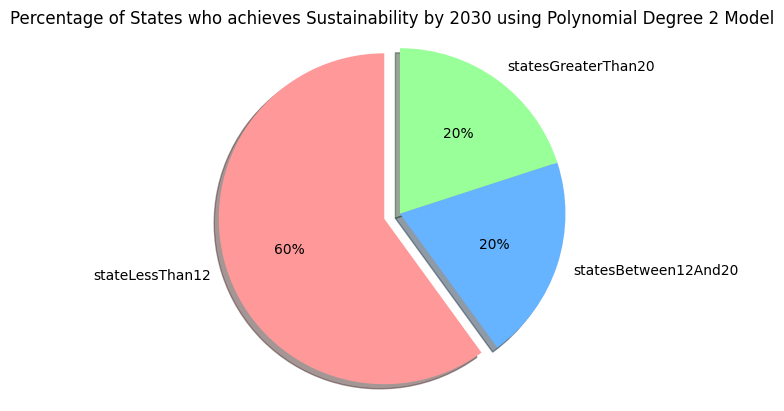

In [64]:
#Pie chart for neo natal mortality, Polynomial Model

stateLessThan12 = (df_final_1["2030(plr)"]<=12).sum()
statesBetween12And20 = ((df_final_1["2030(plr)"]>12) & (df_final_1["2030(plr)"] <=20)).sum()
statesGreaterThan20 = (df_final_1["2030(plr)"]>20).sum()
total = stateLessThan12+statesBetween12And20+statesGreaterThan20

print(stateLessThan12)
print(statesBetween12And20)
print(statesGreaterThan20)

labels = ["stateLessThan12", "statesBetween12And20", "statesGreaterThan20"]
percentage = [stateLessThan12, statesBetween12And20, statesGreaterThan20]

colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors for each variable
explode = (0.1, 0, 0)  # Separate Variable A with a 3D effect

fig, ax = plt.subplots()
ax.pie(percentage, explode=explode, labels=labels, autopct='%d%%', startangle=90, shadow=True, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
ax.set_title('Percentage of States who achieves Sustainability by 2030 using Polynomial Degree 2 Model')
plt.show()

In [31]:
# predict the year in which neonatal_mortality will reach 12
lr_predict_2 = []
plr_predict_2 =[]
year = year.flatten()
for n in neonatal_mortality:
    reg = LR.fit(n.reshape(-1,1),year)
    poly_reg = PLR.fit(poly.fit_transform(n.reshape(-1,1)),year)

    lr_predict_2.append(reg.predict([[12]])[0])
    plr_predict_2.append(poly_reg.predict(poly.fit_transform([[12]]))[0])

In [32]:
df_final_2 = pd.DataFrame(neonatal_mortality,columns=df_birth.columns[1:])
df_final_2.insert(0,"state",states)
df_final_2.insert(6,"NMR-12(lr)",lr_predict_2)
df_final_2.insert(7,"NMR-12(plr)",plr_predict_2)
df_final_2

,state,1992,1998,2005,2015,2019,NMR-12(lr),NMR-12(plr)
0,andhrapradesh,57.653903,61.373822,40.017558,40.139807,35.764376,2035.808271,2129.646325
1,arunachalpradesh,33.724340,27.027027,40.438299,12.251262,7.083046,2013.419099,2011.740644
2,assam,61.293112,35.681795,55.363781,36.110256,24.407505,2022.638854,2027.890988
3,bihar,56.050755,51.700208,52.354518,41.114848,41.289147,2062.951785,1997.635079
4,delhi,39.416354,32.616645,37.322640,22.734619,20.331107,2027.830419,2037.408194
5,goa,32.231978,36.136206,21.247740,11.431184,5.834829,2013.586044,2012.823214
6,gujarat,51.156584,53.033749,50.177846,32.350212,27.401095,2032.612766,2025.316144
7,haryana,51.669675,38.719964,31.850192,22.010021,30.163693,2026.188467,2026.819285
8,himachalpradesh,39.337717,25.227926,23.272467,29.338549,24.745442,2021.364254,1947.759287
9,jammu&kashmir,35.803497,44.149630,40.346730,27.683039,8.965033,2018.186107,2018.154409


18
4
1


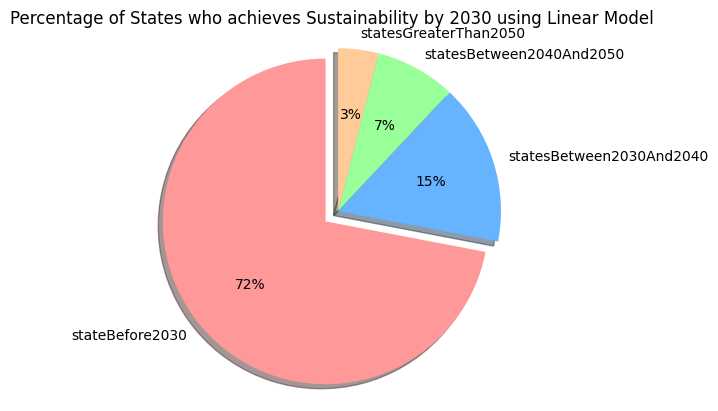

In [63]:
#Pie chart for neo natal mortality, Polynomial Model

stateBefore2030 = (df_final_2["NMR-12(lr)"]<=2030).sum()
statesBetween2030And2040= ((df_final_2["NMR-12(lr)"]>2030) & (df_final_2["NMR-12(lr)"] <=2040)).sum()
statesBetween2040And2050= ((df_final_2["NMR-12(lr)"]>2040) & (df_final_2["NMR-12(lr)"] <=2050)).sum()
statesGreaterThan2050 = (df_final_2["NMR-12(lr)"]>2050).sum()
total = stateBefore2030+statesBetween2030And2040+statesBetween2040And2050+statesGreaterThan2050

print(stateBefore2030)
print(statesBetween2030And2040)
print(statesGreaterThan2050)

labels = ["stateBefore2030", "statesBetween2030And2040", "statesBetween2040And2050", "statesGreaterThan2050"]
percentage = [stateBefore2030, statesBetween2030And2040, statesBetween2040And2050, statesGreaterThan2050]

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom colors for each variable
explode = (0.1, 0, 0, 0)  # Separate Variable A with a 3D effect

fig, ax = plt.subplots()
ax.pie(percentage, explode=explode, labels=labels, autopct='%d%%', startangle=90, shadow=True, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
ax.set_title('Percentage of States who achieves Sustainability by 2030 using Linear Model')
plt.show()